### Import libraries

In [33]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


### Load dataset

In [ ]:
df = pd.read_csv('bmw.csv')

## Basic EDA

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [ ]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0
10780,X1,2017,15981,Automatic,59432,Diesel,125,57.6,2.0


In [ ]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7691,5 Series,2015,12990,Automatic,86000,Diesel,160,51.4,3.0
3901,1 Series,2019,18440,Semi-Auto,4512,Diesel,145,68.9,1.5
3535,3 Series,2019,26495,Semi-Auto,10922,Petrol,145,41.5,2.0
10731,1 Series,2016,14750,Automatic,29878,Diesel,30,65.7,2.0
1746,3 Series,2019,25560,Semi-Auto,3000,Diesel,145,62.8,2.0


## **Dataset info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


### **Missing values**

In [ ]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


### **Duplicate check & Remove duplicates**

In [ ]:
df.duplicated().sum()

np.int64(117)

In [ ]:
df[df.duplicated(keep=False)]


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
173,X4,2019,33998,Semi-Auto,7272,Diesel,150,42.8,2.0
174,X4,2019,33998,Semi-Auto,7272,Diesel,150,42.8,2.0
379,X1,2018,16995,Semi-Auto,17276,Petrol,150,46.3,1.5
393,X1,2018,16995,Semi-Auto,17276,Petrol,150,46.3,1.5
643,1 Series,2019,21898,Manual,4100,Petrol,150,41.5,1.5
...,...,...,...,...,...,...,...,...,...
9797,4 Series,2019,25449,Automatic,6890,Diesel,145,65.7,2.0
9939,M3,2009,16950,Manual,65000,Petrol,580,21.9,4.0
9940,M3,2009,16950,Manual,65000,Petrol,580,21.9,4.0
9942,3 Series,2013,10985,Automatic,70000,Diesel,165,50.4,2.0


In [ ]:
df_clean = df.drop_duplicates()
df_clean.duplicated().sum()

np.int64(0)

### Target analysis (price)

In [ ]:
df["price"].describe()

,price
count,10781.000000
mean,22733.408867
std,11415.528189
min,1200.000000
25%,14950.000000
50%,20462.000000
75%,27940.000000
max,123456.000000


## Target Variable – Price Distribution

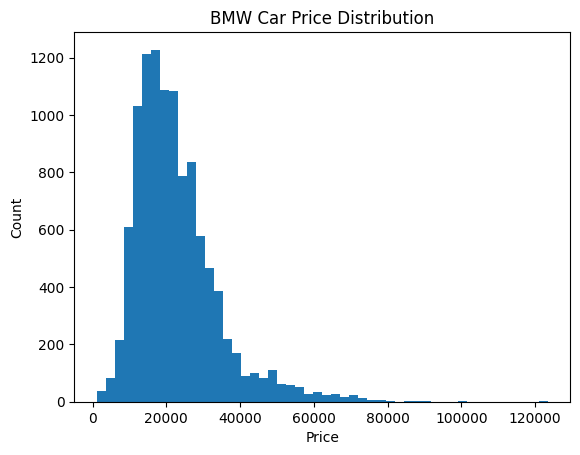

In [34]:
plt.figure()
plt.hist(df["price"], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("BMW Car Price Distribution")
plt.show()


## Price vs Year (Depreciation Logic)

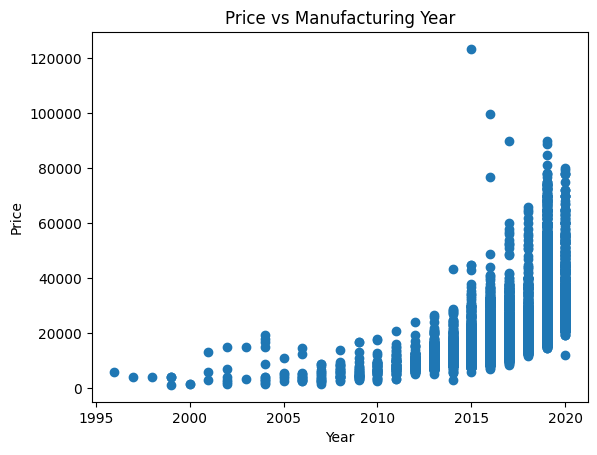

In [35]:
plt.figure()
plt.scatter(df["year"], df["price"])
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Price vs Manufacturing Year")
plt.show()


## Price vs Mileage

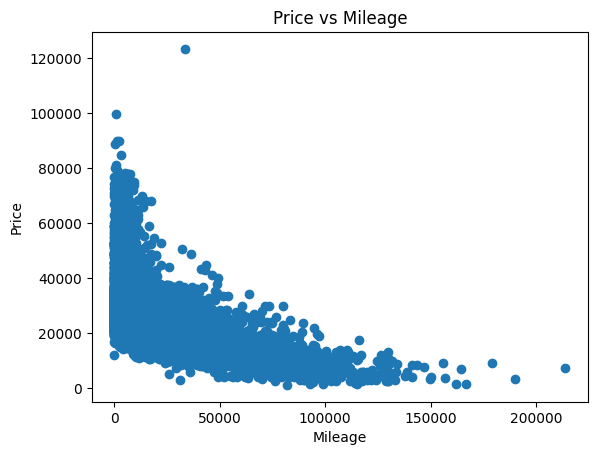

In [36]:
plt.figure()
plt.scatter(df["mileage"], df["price"])
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Price vs Mileage")
plt.show()


## Price by Fuel Type

<Figure size 640x480 with 0 Axes>

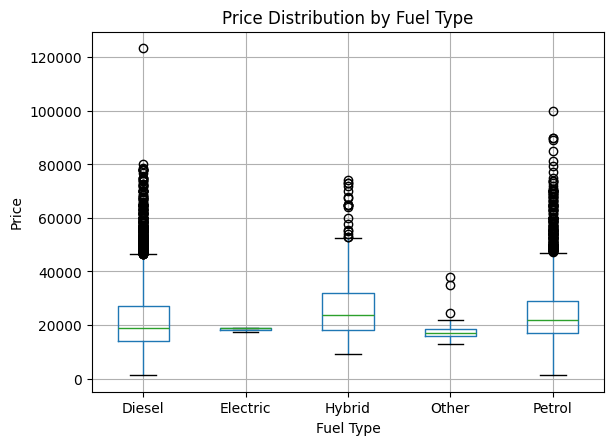

In [37]:
plt.figure()
df.boxplot(column="price", by="fuelType")
plt.title("Price Distribution by Fuel Type")
plt.suptitle("")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()


## Price by Transmission

<Figure size 640x480 with 0 Axes>

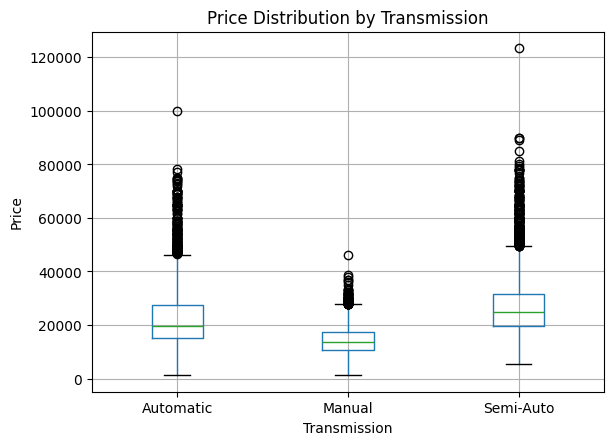

In [38]:
plt.figure()
df.boxplot(column="price", by="transmission")
plt.title("Price Distribution by Transmission")
plt.suptitle("")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show()


## Engine Size vs Price

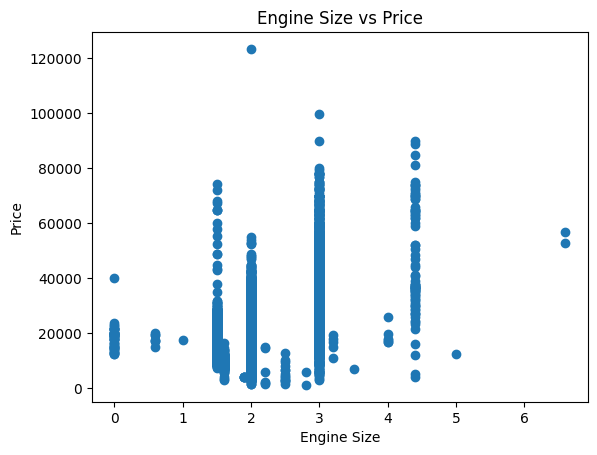

In [39]:
plt.figure()
plt.scatter(df["engineSize"], df["price"])
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs Price")
plt.show()


## Correlation

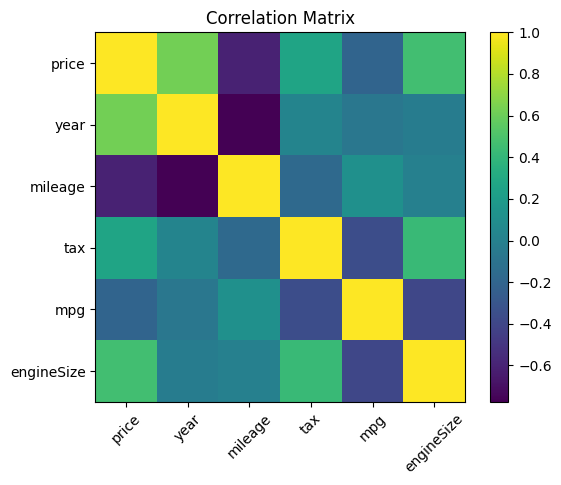

In [40]:
corr = df[["price", "year", "mileage", "tax", "mpg", "engineSize"]].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()


## Feature–Target split

In [ ]:
X = df.drop("price", axis=1)
y = df["price"]


## Define column types

In [ ]:
categorical_cols = ["model", "transmission", "fuelType"]
numerical_cols = ["year", "mileage", "tax", "mpg", "engineSize"]


## Preprocessing pipeline

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)


## Preprocessing pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


## Model definition

In [ ]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)


## Full ML pipeline

In [ ]:
pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", model)
    ]
)


## Train model

In [ ]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['model', 'transmission',
                                                   'fuelType']),
                                                 ('num', 'passthrough',
                                                  ['year', 'mileage', 'tax',
                                                   'mpg', 'engineSize'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

## Predictions

In [ ]:
y_pred = pipeline.predict(X_test)


## Model evaluation

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae, 2))
print("R2 Score:", round(r2, 4))


MAE: 1607.07
R2 Score: 0.9428


## Single prediction example

In [ ]:
sample = pd.DataFrame({
    "model": ["X5"],
    "year": [2019],
    "transmission": ["Automatic"],
    "mileage": [30000],
    "fuelType": ["Diesel"],
    "tax": [150],
    "mpg": [38.0],
    "engineSize": [3.0]
})

predicted_price = pipeline.predict(sample)
print("Predicted price:", int(predicted_price[0]))


Predicted price: 37492
